[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
(33, 35)


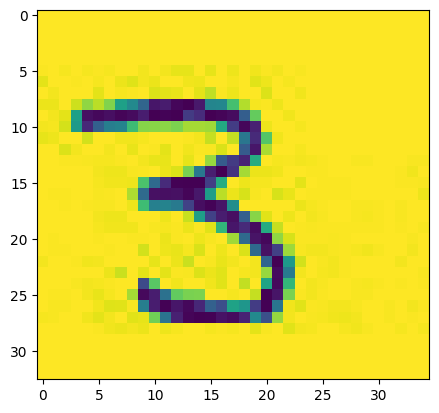

In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('numbers1.jpg')
xtrain = []
ytrain = []
for i in range(50):
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    shape = gray.shape
    x = int(559/15.8)
    y = int(shape[0]/10)
    n = np.random.randint(8)
    n2 = np.random.randint(15)
    digit = gray[y*n:y*(n+1),x*n2:x*(n2+1)]
    
    xtrain.append(digit)
    one_hot = [0,0,0,0,0,0,0,0,0,0]
    one_hot[n] = 1
    ytrain.append(one_hot)
    plt.imshow(digit)

    
dgit = digit.shape
print(one_hot)
print(dgit)

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


xtrain = tf.keras.utils.normalize(xtrain,axis=1)
ytrain = tf.keras.utils.normalize(ytrain,axis=1)
print(xtrain.shape)
print(ytrain.shape)
print(xtrain[0])

(10, 33, 35)
(10, 10)
[[0.17432569 0.17513282 0.17482143 ... 0.17407766 0.17407766 0.17407766]
 [0.17432569 0.17513282 0.17482143 ... 0.17407766 0.17407766 0.17407766]
 [0.17432569 0.17513282 0.17482143 ... 0.17407766 0.17407766 0.17407766]
 ...
 [0.17432569 0.17307243 0.17482143 ... 0.17407766 0.17407766 0.17407766]
 [0.17432569 0.17375923 0.17482143 ... 0.17407766 0.17407766 0.17407766]
 [0.17432569 0.17513282 0.17482143 ... 0.17407766 0.17407766 0.17407766]]


Epoch 1/50
5/5 [==============================] - 2s 6ms/step - loss: 2.3272 - accuracy: 0.1000
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 2.2963 - accuracy: 0.1600
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 2.2760 - accuracy: 0.1600
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 2.2608 - accuracy: 0.1600
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 2.2390 - accuracy: 0.1600
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 2.2117 - accuracy: 0.1600
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 2.1844 - accuracy: 0.1600
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 2.1616 - accuracy: 0.1600
Epoch 9/50
5/5 [==============================] - 0s 5ms/step - loss: 2.1303 - accuracy: 0.1600
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 2.1042 - accuracy: 0.1600
Epoch 11/50
5/5 [======================

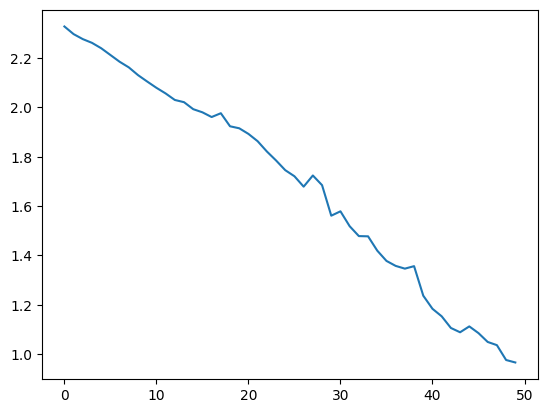

In [3]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=50,batch_size=10)
l = model.history.history['loss']
plt.plot(l)


1/1 [==============================] - 0s 336ms/step - loss: 1.8732 - accuracy: 0.4000


[1.8732131719589233, 0.4000000059604645]

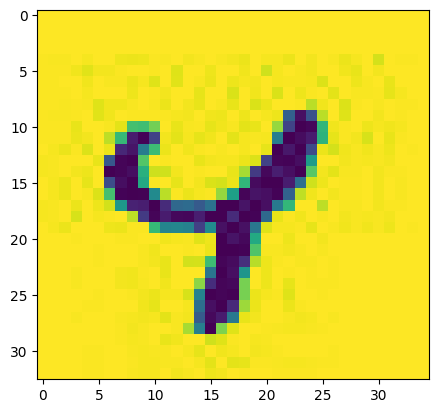

In [4]:
xtrain = []
ytrain = []
for i in range(10):
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    shape = gray.shape
    x = int(559/15.8)
    y = int(shape[0]/10)
    n = np.random.randint(8)
    n2 = np.random.randint(15)
    digit = gray[y*n:y*(n+1),x*n2:x*(n2+1)]
    
    xtrain.append(digit)
    one_hot = [0,0,0,0,0,0,0,0,0,0]
    one_hot[n] = 1
    ytrain.append(one_hot)
    plt.imshow(digit)

xtrain = tf.keras.utils.normalize(xtrain,axis=1)
ytrain = tf.keras.utils.normalize(ytrain,axis=1)
model.evaluate(xtrain,ytrain)

INFO:tensorflow:Assets written to: first_numebr_model\assets


INFO:tensorflow:Assets written to: first_numebr_model\assets


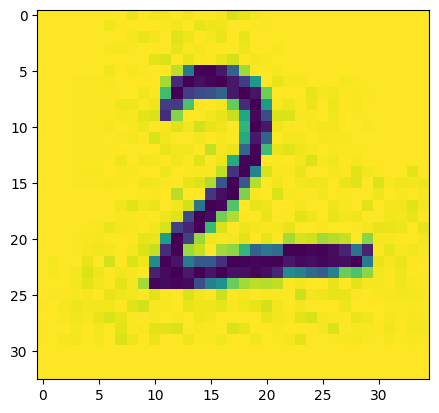

In [5]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
shape = gray.shape
x = int(559/15.8)
y = int(shape[0]/10)
n = np.random.randint(8)
n2 = np.random.randint(15)
digit = gray[y*n:y*(n+1),x*n2:x*(n2+1)]
show = digit     #dgt
xtest = digit
one_hot = [0,0,0,0,0,0,0,0,0,0]
one_hot[n] = 1
ytest = one_hot
plt.imshow(digit)
cv.imshow("img",digit)
xtest = [digit]
ytest = [one_hot]


xtest = tf.keras.utils.normalize(xtest,axis=1)
model.save("first_numebr_model")
cv.waitKey(0)
cv.destroyAllWindows()

In [1]:
new_model = tf.keras.models.load_model("first_numebr_model")
pred = new_model.predict(xtest)
x = 0
lst = list(pred)
m = np.max(pred)
for i in np.nditer(pred):
    if i == np.max(pred):
        print(i)
        print(x)
    x += 1
cv.imshow("dgt",dgit)

NameError: name 'tf' is not defined